In [1]:
import pandas as pd
import csv
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math



# 2016 Census and Income data cleaning and preprocessing

In [4]:
income_df = pd.read_csv("../data/raw/2016Census_G02_VIC_SA2.csv")
income_df

,SA2_MAINCODE_2016,Median_age_persons,Median_mortgage_repay_monthly,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Average_num_psns_per_bedroom,Median_tot_hhd_inc_weekly,Average_household_size
0,201011001,34,1615,702,310,1833,0.8,1585,2.8
1,201011002,42,1500,670,260,1867,0.8,1327,2.3
2,201011003,39,1347,615,250,1574,0.8,1198,2.3
3,201011004,36,1257,528,240,1242,0.8,945,2.2
4,201011005,38,1580,638,300,1921,0.8,1634,2.8
...,...,...,...,...,...,...,...,...,...
459,217041478,44,1400,617,223,1470,0.8,1217,2.5
460,217041479,39,1500,625,250,1510,0.8,1210,2.5
461,217041480,43,1364,610,250,1498,0.8,1144,2.3
462,297979799,49,0,3000,0,0,0.0,0,0.0


In [5]:
income_df = income_df[['SA2_MAINCODE_2016','Median_tot_prsnl_inc_weekly','Median_rent_weekly', 
                       'Median_tot_fam_inc_weekly', 'Median_tot_hhd_inc_weekly' ]]


In [6]:
pop_dfA = pd.read_csv("../data/raw/2016Census_G17A_VIC_SA2.csv")
pop_dfB = pd.read_csv("../data/raw/2016Census_G17B_VIC_SA2.csv")

In [9]:
pop_dfA = pop_dfA[['SA2_MAINCODE_2016','M_Tot_Tot', 'M_PI_NS_ns_Tot']]
pop_dfB = pop_dfB[['SA2_MAINCODE_2016','F_Tot_Tot', 'F_PI_NS_ns_Tot']]
from functools import reduce
dfs = [pop_dfA, pop_dfB]
population_df = reduce(lambda left,right: pd.merge(left,right,on='SA2_MAINCODE_2016'), dfs)

In [14]:

population_df['total_population'] = population_df['M_Tot_Tot']+population_df['M_PI_NS_ns_Tot']+ population_df['F_Tot_Tot']+population_df['F_PI_NS_ns_Tot']

In [15]:
population_df=population_df.drop(columns=['M_Tot_Tot', 'M_PI_NS_ns_Tot' ,'F_Tot_Tot', 'F_PI_NS_ns_Tot'])
population_df

,SA2_MAINCODE_2016,total_population
0,201011001,9485
1,201011002,10922
2,201011003,20423
3,201011004,21811
4,201011005,6125
...,...,...
459,217041478,8373
460,217041479,18457
461,217041480,12104
462,297979799,37


In [16]:
df = pd.merge(income_df, population_df, on='SA2_MAINCODE_2016', how="inner")

In [17]:
df

,SA2_MAINCODE_2016,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
0,201011001,702,310,1833,1585,9485
1,201011002,670,260,1867,1327,10922
2,201011003,615,250,1574,1198,20423
3,201011004,528,240,1242,945,21811
4,201011005,638,300,1921,1634,6125
...,...,...,...,...,...,...
459,217041478,617,223,1470,1217,8373
460,217041479,625,250,1510,1210,18457
461,217041480,610,250,1498,1144,12104
462,297979799,3000,0,0,0,37


In [18]:
df[[ 'Median_tot_prsnl_inc_weekly','Median_rent_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
count,464.00000,464.00000,464.00000,464.00000,464.00000
mean,660.15302,304.36422,1710.42888,1431.33836,11355.34267
std,209.39593,95.64973,523.15972,420.31686,6033.71808
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,547.00000,250.00000,1361.75000,1127.50000,6766.00000
50%,634.00000,321.00000,1655.50000,1411.50000,10672.00000
75%,731.25000,369.25000,2016.50000,1723.00000,15651.25000
max,3000.00000,540.00000,3351.00000,2438.00000,40745.00000


# Removing zero and neg values

In [19]:
df = df[(df['Median_tot_prsnl_inc_weekly'] > 0) & (df['Median_rent_weekly'] > 0)&
        (df['Median_tot_fam_inc_weekly'] > 0) &
        (df['Median_tot_hhd_inc_weekly'] > 0)& (df['total_population'] > 0)] 

In [20]:
df

,SA2_MAINCODE_2016,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
0,201011001,702,310,1833,1585,9485
1,201011002,670,260,1867,1327,10922
2,201011003,615,250,1574,1198,20423
3,201011004,528,240,1242,945,21811
4,201011005,638,300,1921,1634,6125
...,...,...,...,...,...,...
457,217031476,554,245,1205,936,3334
458,217041477,613,150,1482,1210,5759
459,217041478,617,223,1470,1217,8373
460,217041479,625,250,1510,1210,18457


In [21]:
df[[ 'Median_tot_prsnl_inc_weekly','Median_rent_weekly','Median_tot_fam_inc_weekly','Median_tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
count,453.00000,453.00000,453.00000,453.00000,453.00000
mean,658.65342,311.49007,1744.79029,1450.15011,11612.42605
std,156.47613,84.82881,457.39634,380.44682,5862.29146
min,338.00000,80.00000,843.00000,477.00000,42.00000
25%,549.00000,250.00000,1382.00000,1142.00000,7090.00000
50%,636.00000,325.00000,1662.00000,1417.00000,10795.00000
75%,730.00000,370.00000,2020.00000,1723.00000,15754.00000
max,1341.00000,540.00000,3351.00000,2438.00000,40745.00000


# Removing outliers

In [27]:
df = df[(df['Median_tot_fam_inc_weekly'] > 1382 - ((2020-1382)*1.5)) &
        (df['Median_tot_fam_inc_weekly'] <= 2020 + ((2020-1382)*1.5))]

df = df[(df['Median_rent_weekly'] > 250 - ((370-250)*1.5)) & 
        (df['Median_rent_weekly'] <= 370 + ((370-250)*1.5))]

df = df[(df['Median_tot_prsnl_inc_weekly'] > 549 - ((730-549)*1.5)) &
        (df['Median_tot_prsnl_inc_weekly'] <= 730 + ((730-549)*1.5))]



In [28]:
df2 = df[(df['total_population'] < 1000)]
df2

,SA2_MAINCODE_2016,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
60,204011061,458,200,1291,747,179
87,205031088,412,150,843,477,103
185,208031184,900,357,2074,900,42


In [29]:
df = df[(df['total_population'] > 1000 ) &
        (df['total_population'] <= 15754 +  ((15754-7090)*1.5))]

In [30]:
df

,SA2_MAINCODE_2016,Median_tot_prsnl_inc_weekly,Median_rent_weekly,Median_tot_fam_inc_weekly,Median_tot_hhd_inc_weekly,total_population
0,201011001,702,310,1833,1585,9485
1,201011002,670,260,1867,1327,10922
2,201011003,615,250,1574,1198,20423
3,201011004,528,240,1242,945,21811
4,201011005,638,300,1921,1634,6125
...,...,...,...,...,...,...
457,217031476,554,245,1205,936,3334
458,217041477,613,150,1482,1210,5759
459,217041478,617,223,1470,1217,8373
460,217041479,625,250,1510,1210,18457


array([[<AxesSubplot:title={'center':'SA2_MAINCODE_2016'}>,
        <AxesSubplot:title={'center':'Median_tot_prsnl_inc_weekly'}>],
       [<AxesSubplot:title={'center':'Median_rent_weekly'}>,
        <AxesSubplot:title={'center':'Median_tot_fam_inc_weekly'}>],
       [<AxesSubplot:title={'center':'Median_tot_hhd_inc_weekly'}>,
        <AxesSubplot:title={'center':'total_population'}>]], dtype=object)

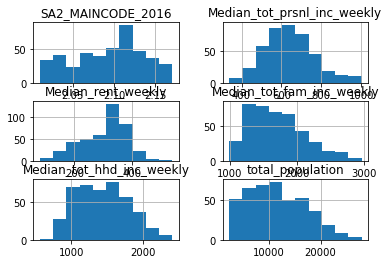

In [31]:
df.hist()

In [32]:
df.to_csv('../data/raw/income_and_pop_2016.csv', index=False)

# 2011 Census and Income data cleaning and preprocessing


In [ ]:
income_df = pd.read_csv("../data/raw/2011Census_B02_VIC_SA2.csv")
income_df

In [ ]:
income_df2 = income_df2[['region_id','Median_Tot_prsnl_inc_weekly','Median_rent_weekly', 
                       'Median_Tot_fam_inc_weekly', 'Median_Tot_hhd_inc_weekly' ]]


In [ ]:
pop_dfA2 = pd.read_csv("../data/raw/2011Census_B17A_VIC_SA2_short.csv")
pop_dfB2 = pd.read_csv("../data/raw/2011Census_B17B_VIC_SA2_short.csv")


In [ ]:
pop_dfA2 = pop_dfA2[['region_id','M_Tot_Tot', 'M_PI_NS_ns_Tot']]
pop_dfB2 = pop_dfB2[['region_id','F_Tot_Tot', 'F_PI_NS_ns_Tot']]


In [ ]:
from functools import reduce
dfs2 = [pop_dfA2, pop_dfB2]
population_df2 = reduce(lambda left,right: pd.merge(left,right,on='region_id'), dfs2)


In [ ]:

population_df2['total_population'] = population_df2['M_Tot_Tot']+population_df2['M_PI_NS_ns_Tot']+ population_df2['F_Tot_Tot']+population_df2['F_PI_NS_ns_Tot']

In [ ]:
population_df2=population_df2.drop(columns=['M_Tot_Tot', 'M_PI_NS_ns_Tot' ,'F_Tot_Tot', 'F_PI_NS_ns_Tot'])
population_df2

In [ ]:
df_2011 = pd.merge(income_df2, population_df2, on='region_id', how="inner")

In [ ]:
df_2011[[ 'Median_Tot_prsnl_inc_weekly','Median_rent_weekly','Median_Tot_fam_inc_weekly','Median_Tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

# Removing zero and neg values

In [ ]:
df_2011 = df_2011[(df_2011['Median_Tot_prsnl_inc_weekly'] > 0) & (df_2011['Median_rent_weekly'] > 0)&
        (df_2011['Median_Tot_fam_inc_weekly'] > 0) &
        (df_2011['Median_Tot_hhd_inc_weekly'] > 0)& (df_2011['total_population'] > 0)] 

# Removing outliers 

In [ ]:
df_2011[[ 'Median_Tot_prsnl_inc_weekly','Median_rent_weekly','Median_Tot_fam_inc_weekly','Median_Tot_hhd_inc_weekly',
    'total_population']].describe().apply(lambda s: s.apply('{0:.5f}'.format))

In [ ]:
#areas with less than 1000 population

df_low_Pop = df[(df['total_population'] < 1000)]
len(df_low_Pop)



In [ ]:

df_2011 = df_2011[(df_2011['Median_Tot_fam_inc_weekly'] > 1163 - ((1748.50-1163)*1.5)) &
        (df_2011['Median_Tot_fam_inc_weekly'] <= 1748.50 + ((1748.50-1163)*1.5))]

df_2011 = df_2011[(df_2011['Median_rent_weekly'] > 200 - ((321-200)*1.5)) & 
        (df_2011['Median_rent_weekly'] <= 321 + ((321-200)*1.5))]

df_2011 = df_2011[(df_2011['Median_Tot_prsnl_inc_weekly'] > 473.5 - ((644.5-473.5)*1.5)) &
        (df_2011['Median_Tot_prsnl_inc_weekly'] <= 644.5 + ((644.5-473.5)*1.5))]


In [ ]:
df_2011 = df_2011[(df_2011['total_population'] > 1000 ) &
        (df_2011['total_population'] <= 15023 +  ((15023-6311)*1.5))]

In [ ]:
df_2011.hist()

In [ ]:
df_2011.to_csv('../data/raw/income_and_pop_2011.csv', index=False)